In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

In [3]:
lowess = sm.nonparametric.lowess

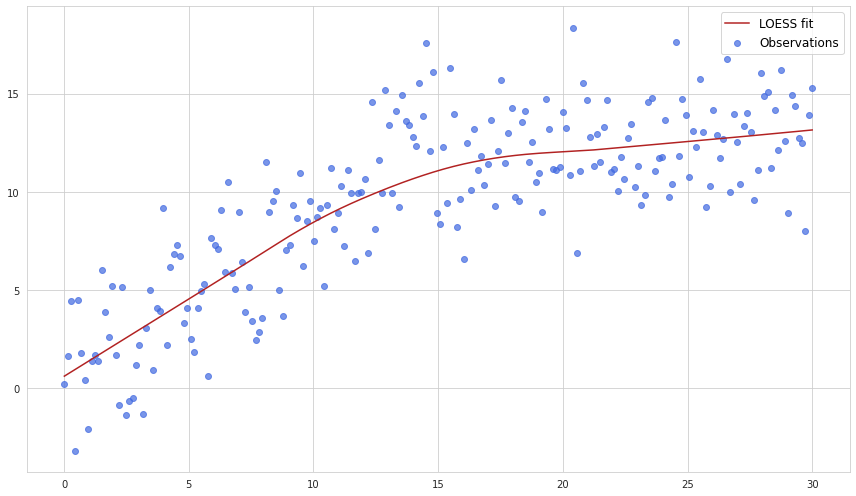

In [98]:
x = np.linspace(start=0.01, stop=30, num=220)

x_half1 = x[:round(x.size/2)]
x_half2 = x[round(x.size/2):]
y_half1 = 0.85*x_half1 + 0.2
y_half2 = 0.2*x_half2 + 8
y = np.concatenate([y_half1, y_half2]) + np.random.standard_normal(size=x.size)*2.5

loess_result = lowess(exog=x, endog=y, frac=0.6, it=3).T
x_loess, y_loess = loess_result[0], loess_result[1]

with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize=(12,7))
plt.scatter(x, y, color='royalblue', alpha=0.7, label='Observations')
plt.plot(x_loess, y_loess, color='firebrick', label='LOESS fit')
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('../../assets/images/regression/loess_examples.png', bbox_inches='tight');